In [22]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt

In [25]:
import numpy as np

In [30]:
# MNIST
from sklearn import datasets
digits = datasets.load_digits()
X_train = digits['data']
y_train = digits['target']

In [28]:
import sys
sys.path.insert(0, "../research/fashion-mnist/")

In [29]:
# MNIST-FASHION
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('../research/fashion-mnist/data/fashion', kind='train')
# X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [38]:
import openTSNE
from openTSNE import initialization

# default tsne

In [16]:
from openTSNE import TSNE

In [17]:
tsne = TSNE(n_jobs=8)

In [19]:
N = -1

In [32]:
%time embd_tsne = tsne.fit(X_train[:N])

/home/antoine/anaconda3/envs/raviz_hybrid/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/raviz_hybrid/lib/python3.7/site-packages/pynndescent/pynndescent_.py", line 38:
    @numba.njit(parallel=True, fastmath=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  self.func_ir.loc))
/home/antoine/anaconda3/envs/raviz_hybrid/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

F

CPU times: user 5min 33s, sys: 20.3 s, total: 5min 53s
Wall time: 48.6 s


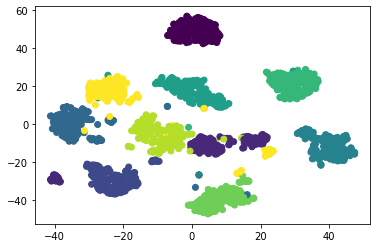

In [33]:
fig, ax = plt.subplots()
ax.scatter(embd_tsne[:,0], embd_tsne[:,1], c=y_train[:N], rasterized=True)

# stochastic sampling

In [34]:
from importlib import reload

In [35]:
import stochasticsampling
stochasticsampling = reload(stochasticsampling)

In [36]:
%time affinity = stochasticsampling.StochasticNN(X_train)

CPU times: user 119 ms, sys: 0 ns, total: 119 ms
Wall time: 118 ms


In [39]:
%time init = initialization.pca(X_train, random_state=42)

CPU times: user 25.8 ms, sys: 3.88 ms, total: 29.7 ms
Wall time: 8.17 ms


In [40]:
res = []


embedding = stochasticsampling.TSNEEmbedding(
    init,
    affinity,
#     optimizer=openTSNE.tsne.gradient_descent(),
    optimizer=stochasticsampling.gradient_descent(),
    callbacks=lambda it, err, emb: res.append((it, err)),
    callbacks_every_iters=1,
    n_jobs=8,
)

In [41]:
%time embedding1 = embedding.optimize_(n_iter=250, exaggeration=12, momentum=0.5)

test
iteration:0
iteration:1
iteration:2
iteration:3
iteration:4
iteration:5
iteration:6
iteration:7
iteration:8
iteration:9
iteration:10
iteration:11
iteration:12
iteration:13
iteration:14
iteration:15
iteration:16
iteration:17
iteration:18
iteration:19
iteration:20
iteration:21
iteration:22
iteration:23
iteration:24
iteration:25
iteration:26
iteration:27
iteration:28
iteration:29
iteration:30
iteration:31
iteration:32
iteration:33
iteration:34
iteration:35
iteration:36
iteration:37
iteration:38
iteration:39
iteration:40
iteration:41
iteration:42
iteration:43
iteration:44
iteration:45
iteration:46
iteration:47
iteration:48
iteration:49
iteration:50
iteration:51
iteration:52
iteration:53
iteration:54
iteration:55
iteration:56
iteration:57
iteration:58
iteration:59
iteration:60
iteration:61
iteration:62
iteration:63
iteration:64
iteration:65
iteration:66
iteration:67
iteration:68
iteration:69
iteration:70
iteration:71
iteration:72
iteration:73
iteration:74
iteration:75
iteration:76
iter

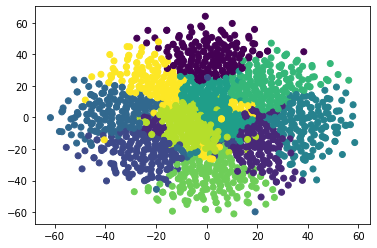

In [49]:
plt.scatter(embedding1[:,0], embedding1[:,1], c=y_train)

In [42]:
embedding1.kl_divergence

-0.10797089201326715

In [43]:
res = np.array(res)

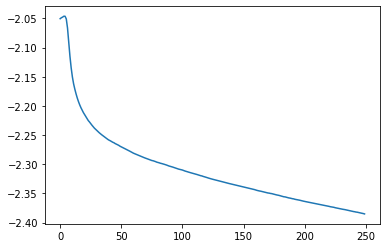

In [44]:
plt.plot(res[:,1])

In [46]:
res = []

In [47]:
%time embedding2 = embedding1.optimize_(n_iter=750, exaggeration=1, momentum=0.8)

test
iteration:0
iteration:1
iteration:2
iteration:3
iteration:4
iteration:5
iteration:6
iteration:7
iteration:8
iteration:9
iteration:10
iteration:11
iteration:12
iteration:13
iteration:14
iteration:15
iteration:16
iteration:17
iteration:18
iteration:19
iteration:20
iteration:21
iteration:22
iteration:23
iteration:24
iteration:25
iteration:26
iteration:27
iteration:28
iteration:29
iteration:30
iteration:31
iteration:32
iteration:33
iteration:34
iteration:35
iteration:36
iteration:37
iteration:38
iteration:39
iteration:40
iteration:41
iteration:42
iteration:43
iteration:44
iteration:45
iteration:46
iteration:47
iteration:48
iteration:49
iteration:50
iteration:51
iteration:52
iteration:53
iteration:54
iteration:55
iteration:56
iteration:57
iteration:58
iteration:59
iteration:60
iteration:61
iteration:62
iteration:63
iteration:64
iteration:65
iteration:66
iteration:67
iteration:68
iteration:69
iteration:70
iteration:71
iteration:72
iteration:73
iteration:74
iteration:75
iteration:76
iter

iteration:593
iteration:594
iteration:595
iteration:596
iteration:597
iteration:598
iteration:599
iteration:600
iteration:601
iteration:602
iteration:603
iteration:604
iteration:605
iteration:606
iteration:607
iteration:608
iteration:609
iteration:610
iteration:611
iteration:612
iteration:613
iteration:614
iteration:615
iteration:616
iteration:617
iteration:618
iteration:619
iteration:620
iteration:621
iteration:622
iteration:623
iteration:624
iteration:625
iteration:626
iteration:627
iteration:628
iteration:629
iteration:630
iteration:631
iteration:632
iteration:633
iteration:634
iteration:635
iteration:636
iteration:637
iteration:638
iteration:639
iteration:640
iteration:641
iteration:642
iteration:643
iteration:644
iteration:645
iteration:646
iteration:647
iteration:648
iteration:649
iteration:650
iteration:651
iteration:652
iteration:653
iteration:654
iteration:655
iteration:656
iteration:657
iteration:658
iteration:659
iteration:660
iteration:661
iteration:662
iteration:663
iterat

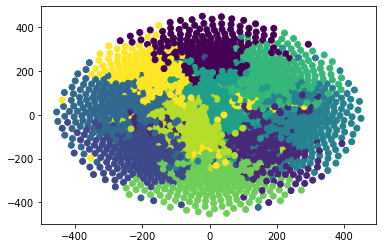

In [48]:
plt.scatter(embedding2[:,0], embedding2[:,1], c=y_train)

In [50]:
affinities_annealing = openTSNE.affinity.PerplexityBasedNN(X_train)

/home/antoine/anaconda3/envs/raviz_hybrid/lib/python3.7/site-packages/pynndescent/pynndescent_.py:199: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/raviz_hybrid/lib/python3.7/site-packages/pynndescent/utils.py", line 459:
@numba.njit(parallel=True)
def new_build_candidates(
^

  seed_per_row,
/home/antoine/anaconda3/envs/raviz_hybrid/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/raviz_hybrid/lib/python3.7/site-packages/pynndes

# check "real" kl divergence

In [33]:
res_ = []
embedding_default = openTSNE.TSNEEmbedding(
    embedding2, affinities_annealing,
    callbacks=lambda it, err, emb: res_.append((it, err)),
    callbacks_every_iters=1,)

In [34]:
embedding_default.optimize(n_iter=1)

TSNEEmbedding([[-3.75796124,  6.97082329],
               [ 6.82146683, -3.83045419],
               [ 2.44580774, -3.62741964],
               ...,
               [ 3.02059451, -7.36933375],
               [ 1.72857314, -1.49921902],
               [-4.10033132, -0.56036511]])

In [36]:
res_

[(1, 5.4384499435383855)]

# continue optimisation with ss affinity

In [37]:
res_cont = []
embedding_cont = openTSNE.TSNEEmbedding(
    embedding1, embedding1.affinities,
    callbacks=lambda it, err, emb: res_cont.append((it, err)),
    callbacks_every_iters=1,)

In [38]:
embedding_cont.optimize(n_iter=750, exaggeration=1, momentum=0.8)

TSNEEmbedding([[-27.66330111,  61.32446262],
               [ 58.14531751, -32.8567922 ],
               [ 20.12071042, -29.70923919],
               ...,
               [ 29.33940336, -62.31874477],
               [ 18.6670468 , -10.36379075],
               [-33.46748837,  -3.04959341]])

In [39]:
res_cont = np.array(res_cont)

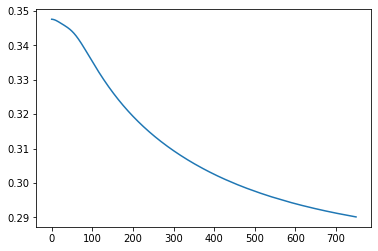

In [40]:
plt.plot(res_cont[:,1])

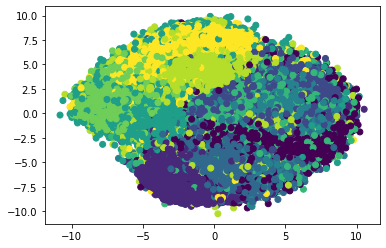

In [43]:
plt.scatter(embedding_cont[:,0], embedding_cont[:,1], c=y_train)

# 1-NN classification

In [46]:
import sklearn

In [47]:
split = sklearn.model_selection.ShuffleSplit(n_splits=1, random_state=0, test_size=0.25)

In [49]:
id_train, id_test = next(split.split(embedding_cont))

In [50]:
Xemb_train = embedding_cont[id_train]
Xemb_test  = embedding_cont[id_test]

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
neigh = KNeighborsClassifier(n_neighbors=1)

In [53]:
%time neigh.fit(Xemb_train, y_train[id_train]) 

CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 22.9 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [54]:
%time y_pred = neigh.predict(Xemb_test)

CPU times: user 386 ms, sys: 23 µs, total: 386 ms
Wall time: 385 ms


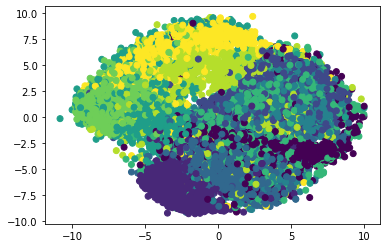

In [55]:
plt.scatter(Xemb_test[:,0], Xemb_test[:,1], c=y_pred, rasterized=True)

In [56]:
y_true = y_train[id_test]

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_true, y_pred)

0.5224